# Práctica 6a: medidas de distancia para el análisis de clustering en R

##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources
* [Chapter 2 Data Preparation and R Packages](https://drive.google.com/open?id=1aZ9PZ-ohlwQMgaz8uqFu0idOIXF85sRP)
* [Chapter 3 Clustering Distance Measures](https://drive.google.com/open?id=1aZ9PZ-ohlwQMgaz8uqFu0idOIXF85sRP)


## Recipe

### Métodos para medir distancias

La clasificación no supervisada de las observaciones en grupos, requiere algunos métodos para calcular la distancia o la (des)similitud entre cada par de observaciones. El resultado de este cálculo se conoce como **matriz de disimilitud o distancia**.

El cálculo de la distancia se define como la similitud ( $n$-espacial) entre dos elementos $(x,y)$, la forma de medir esta similitud e influirá drásticamente en la forma de los clústers.

Los métodos clásicos para la medición de distancias son las distancias Euclidana y de Manhattan, que se definen de la siguiente manera:

$$d_{euc}(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$

$$d_{man}(x,y)=\sum_{i=1}^{n}{|(x_i-y_i)|}$$

Donde $x$ y $y$ son dos vectores de longitud $n$

Si se elige la distancia euclidiana, entonces las observaciones con altos valores de similitud de sus características se agruparán.

Otras medidas de similitud son las distancias basadas en la correlación, que se utilizan ampliamente para el análisis de datos en el área genética (dónde las características son en mayor número que las observaciones). La distancia basada en la correlación se define restando el coeficiente de correlación de la unidad 1. Se pueden utilizar diferentes tipos de métodos de correlación, como la *distancia de correlación de Pearson* o correlación paramétrica, ya que depende de la distribución de los datos $(\bar{x})$:

$$d_{cor}(x,y)=1-\frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}{\sum_{i=1}^{n}{(y_i-\bar{y})^2}}}$$

La distancia basada en la correlación considera que dos objetos son similares si sus características están altamente correlacionadas, aunque los valores observados puedan estar muy alejados en términos de distancia euclidiana. La distancia entre dos objetos es 0 cuando están perfectamente correlacionados. La correlación de Pearson es bastante sensible a los valores atípicos. Esto no importa cuando se agrupan las muestras, porque la correlación se da en miles de genes. Cuando se agrupan genes, es importante ser consciente del posible impacto de los valores atípicos. Esto puede ser mitigado usando la correlación de Spearman en lugar de la de Pearson.

Si queremos identificar grupos de observaciones con los mismos perfiles generales independientemente de sus magnitudes, entonces deberíamos utilizar la distancia basada en la correlación como medida de disimilitud. Esto es particularmente el caso en el análisis de datos de expresión génica, donde podríamos considerar que los genes son similares cuando están "arriba" $(1)$ y "abajo" $(-1)$ juntos. También es el caso en el **marketing** si queremos identificar grupos de compradores con la misma preferencia en cuanto a artículos, independientemente del volumen de los mismos.

### Cálculo de la matriz de distancia

#### Preparación de los datos

Para realizar un análisis de clustering en R, generalmente, los datos deben prepararse de la siguiente manera:
1. Las filas son observaciones y las columnas son variables
2. Cualquier valor que falte en los datos debe ser eliminado o estimado (rellenar o imputar).
3. Los datos deben estar estandarizados (es decir, escalados) para que las variables sean comparables. 

Aquí, usaremos el conjunto de datos "*USArrests*", que contiene estadísticas de arrestos (por cada 100,000 residentes) por asalto, asesinato y violación en cada uno de los 50 estados de EE.UU. en el año 1973. También incluye el porcentaje de la población que vive en áreas urbanas.

In [1]:
data("USArrests") # Load the data set
df <- USArrests # Use df as shorter name

Checar la estructura del conjunto de datos

In [2]:
str(df)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


Eliminar cualquier valor que falte y que pueda estar presente en los datos con `na.omit()`

In [3]:
df <- na.omit(df)

Escalar los datos usando la función `scale()`

In [4]:
df <- scale(df)

Damos un vistazo al dataframe 

In [5]:
head(df, n = 3)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388


#### Subconjuntos aleatorio del conjunto de datos

Usaremos sólo un subconjunto de los datos tomando 15 observaciones aleatorias entre las 50 observaciones totales del conjunto de datos. Esto se hace usando la función `sample(`. Después, estandarizamos los datos utilizando la función `scale()`

In [6]:
set.seed(123) #proponemos una semilla para que sea reproducible el experimento
ss <- sample(1:50, 15) #tomamos 15 observaciones 
df <- USArrests[ss, ]  #creamos el subcojunto
df.scaled <- scale(df) #estandarizamos los valores de las caracterícticas

### Calcular la distancia euclidiana

Para calcular la distancia euclídeana se puede utilizar la función `dist()`

In [7]:
# Otros métodos pueden ser: “euclidean”, “maximum”, “manhattan”, “canberra”, “binary”, “minkowski”.
dist.eucl <- dist(df.scaled, method = "euclidean") 

Para facilitar la visualización de la información de estas distancias generadas, se puede reformatear el vector de distancia en una matriz utilizando la función `as.matrix()`

In [8]:
# Subconjunto de las 3 primeras características y observaciones, y valores redondeados
round(as.matrix(dist.eucl)[1:3, 1:3], 1)

,New Mexico,Iowa,Indiana
New Mexico,0.0,4.1,2.5
Iowa,4.1,0.0,1.8
Indiana,2.5,1.8,0.0


En esta matriz, el valor representa la distancia entre los objetos. Los valores en la diagonal de la matriz representan la distancia entre los objetos y ellos mismos (que deben ser cero)

#### Cálculo de distancias para datos mixtos

La función `daisy()` de la librería `cluster` es capaz de manejar otros tipos de variables además de la numérica (por ejemplo, nominal, ordinal, binaria (a)simétrica). Además, del coeficiente de Gower, que es una de las medidas de proximidad más populares para tipos de datos mixtos.

El conjunto de datos `flower` contiene cracterísticas de de flores y contiene variables factoriales (categóricas), ordinales (categóricas ordenadas) y numéricas

In [9]:
library(cluster) 

In [10]:
data(flower) 
head(flower, 3)

,V1,V2,V3,V4,V5,V6,V7,V8
,<fct>,<fct>,<fct>,<fct>,<ord>,<ord>,<dbl>,<dbl>
1,0,1,1,4,3,15,25,15
2,1,0,0,2,1,3,150,50
3,0,1,0,3,3,1,150,50


Checamos la estructura del conjunto de datos

In [11]:
str(flower)

'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...


Calculamos la matriz de distancias y la ordenamos

In [12]:
dd <- daisy(flower) 
round(as.matrix(dd)[1:3, 1:3], 2)

,1,2,3
1,0.00,0.89,0.53
2,0.89,0.00,0.51
3,0.53,0.51,0.00


### Visualización de matrices de distancia

Una solución sencilla para visualizar las matrices de distancia es utilizar la función `fviz_dist(` de la librería `factoextra`.

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



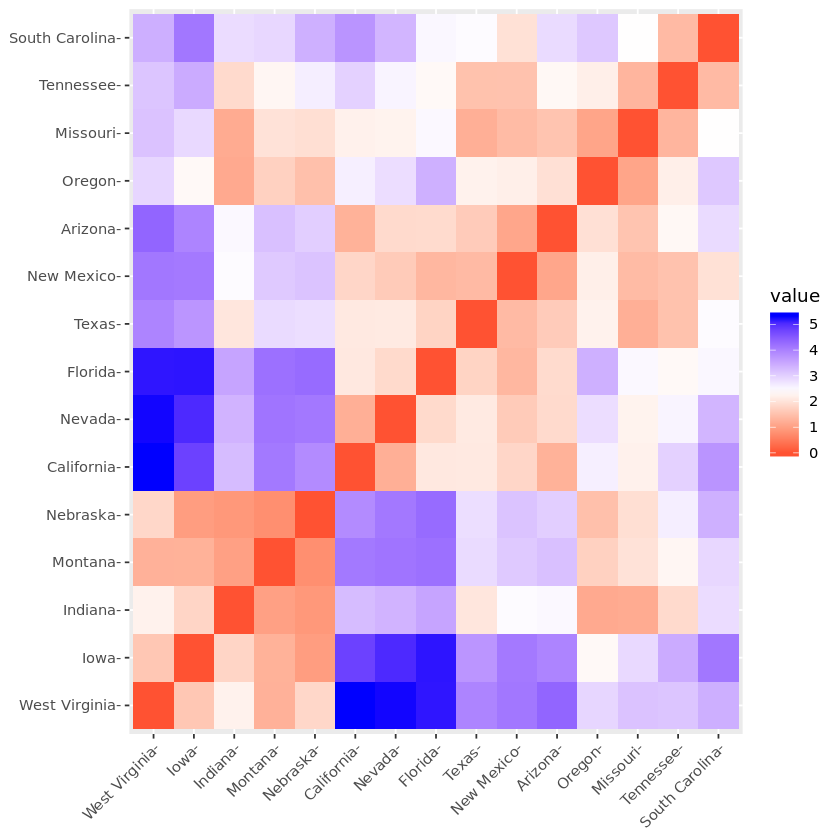

In [13]:
library("factoextra") 
fviz_dist(dist.eucl)
#Rojo: alta similaridad (baja disimilaridad) 
#Azil: baja similaridad (alta disimilaridad) 

El nivel de color es proporcional al valor de la diferencia entre las observaciones: rojo si $d(x,y)=0$ y azul si $dist(x,y)=1$. Los objetos que pertenecen al mismo cluster se visualizan en orden consecutivo.